<strong>Assignment
Consume this REST WEB SERVICE API: https://gorest.co.in/public-api/users?_format=json&access-token=H4lYmIGLXZkDlpy_w0ZVS5rgcpDXbN7fhRRy <br>
Make database to save the data and run some SQL on it 
then make a csv file make some analysis on them using pandas
</strong>

In [1]:
import requests
import json
import sqlite3
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.2)
sns.set_palette('viridis')

In [2]:
response = requests.get('https://gorest.co.in/public-api/users?_format=json&access-token=H4lYmIGLXZkDlpy_w0ZVS5rgcpDXbN7fhRRy')
response

<Response [200]>

In [3]:
res = response.text

In [4]:
res_dict = json.loads(res)
res_dict

{'code': 200,
 'meta': {'pagination': {'total': 1829, 'pages': 92, 'page': 1, 'limit': 20}},
 'data': [{'id': 2143,
   'name': 'Rahul',
   'email': 'docema165sun4o613@gmail.com',
   'gender': 'male',
   'status': 'active'},
  {'id': 2144,
   'name': 'Miguel Pepito',
   'email': 'testertester1@tester.com',
   'gender': 'male',
   'status': 'active'},
  {'id': 2152,
   'name': 'Miguel Pepito',
   'email': 'testerSP@tester.com',
   'gender': 'male',
   'status': 'active'},
  {'id': 2162,
   'name': 'Miguel Pepito',
   'email': 'teesterSP@testerSP.com',
   'gender': 'male',
   'status': 'active'},
  {'id': 2166,
   'name': 'Usuario PicPay',
   'email': 'AA54usuario01@teste.com',
   'gender': 'male',
   'status': 'active'},
  {'id': 54,
   'name': 'Bhagavaan Dhawan',
   'email': 'dhawan_bhagavaan@miller-doyle.name',
   'gender': 'female',
   'status': 'active'},
  {'id': 56,
   'name': 'Divaakar Dutta',
   'email': 'dutta_divaakar@dach.name',
   'gender': 'male',
   'status': 'active'},
  {

In [5]:
for i, data in enumerate(res_dict['data']):
    ID = data['id']
    name = data['name']
    email = data['email']
    status = data['status']
    
    
    datas = [ID,name,email,status]
    print(datas)

[2143, 'Rahul', 'docema165sun4o613@gmail.com', 'active']
[2144, 'Miguel Pepito', 'testertester1@tester.com', 'active']
[2152, 'Miguel Pepito', 'testerSP@tester.com', 'active']
[2162, 'Miguel Pepito', 'teesterSP@testerSP.com', 'active']
[2166, 'Usuario PicPay', 'AA54usuario01@teste.com', 'active']
[54, 'Bhagavaan Dhawan', 'dhawan_bhagavaan@miller-doyle.name', 'active']
[56, 'Divaakar Dutta', 'dutta_divaakar@dach.name', 'active']
[58, 'Bhavani Tandon', 'tandon_bhavani@weissnat-medhurst.net', 'inactive']
[59, 'Ms. Aaditya Gowda', 'aaditya_ms_gowda@boehm-hessel.net', 'active']
[60, 'Mohini Embranthiri', 'mohini_embranthiri@mckenzie-johns.info', 'inactive']
[61, 'Shashi Desai', 'desai_shashi@herzog-zulauf.net', 'inactive']
[2173, 'Miguel Pepito', 'terSP@testerSP.com', 'active']
[63, 'Amrita Shukla', 'amrita_shukla@welch.biz', 'active']
[64, 'Bheeshma Saini', 'saini_bheeshma@jaskolski.org', 'inactive']
[65, 'Subodh Kakkar', 'kakkar_subodh@beatty.name', 'active']
[66, 'Bhoopati Dwivedi', 'bho

In [8]:
connection = sqlite3.connect('customers.db')
sql_comm = ('INSERT INTO customers (ID,Name,Email,Gender,Status) VALUES (?,?,?,?,?)')

for i, data in enumerate(res_dict['data']):
    ID = data['id']
    name = data['name']
    email = data['email']
    gender = data['gender']
    status = data['status']
    
    
    datas = [ID,name,email,gender,status]
    connection.execute(sql_comm,datas)
    connection.commit()

connection.close()

In [9]:
df = pd.DataFrame(res_dict['data'])
df

,id,name,email,gender,status
0,2143,Rahul,docema165sun4o613@gmail.com,male,active
1,2144,Miguel Pepito,testertester1@tester.com,male,active
2,2152,Miguel Pepito,testerSP@tester.com,male,active
3,2162,Miguel Pepito,teesterSP@testerSP.com,male,active
4,2166,Usuario PicPay,AA54usuario01@teste.com,male,active
5,54,Bhagavaan Dhawan,dhawan_bhagavaan@miller-doyle.name,female,active
6,56,Divaakar Dutta,dutta_divaakar@dach.name,male,active
7,58,Bhavani Tandon,tandon_bhavani@weissnat-medhurst.net,male,inactive
8,59,Ms. Aaditya Gowda,aaditya_ms_gowda@boehm-hessel.net,female,active
9,60,Mohini Embranthiri,mohini_embranthiri@mckenzie-johns.info,male,inactive


In [10]:
df.to_csv('Customer_data.csv')

### Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20 non-null     int64 
 1   name    20 non-null     object
 2   email   20 non-null     object
 3   gender  20 non-null     object
 4   status  20 non-null     object
dtypes: int64(1), object(4)
memory usage: 928.0+ bytes


In [12]:
df.describe(include='all')

,id,name,email,gender,status
count,20.000000,20,20,20,20
unique,NaN,17,20,2,2
top,NaN,Miguel Pepito,kakkar_subodh@beatty.name,male,active
freq,NaN,4,1,13,13
mean,691.000000,NaN,NaN,NaN,NaN
std,984.459136,NaN,NaN,NaN,NaN
min,54.000000,NaN,NaN,NaN,NaN
25%,60.750000,NaN,NaN,NaN,NaN
50%,66.500000,NaN,NaN,NaN,NaN
75%,2143.250000,NaN,NaN,NaN,NaN


In [13]:
for col in df.columns:
    print(f'For column {col}')
    print(f'{df[col].value_counts()}')
    print("********************************************************************")

For column id
2143    1
63      1
65      1
66      1
67      1
2173    1
69      1
70      1
2152    1
64      1
54      1
68      1
2162    1
2166    1
56      1
58      1
59      1
60      1
61      1
2144    1
Name: id, dtype: int64
********************************************************************
For column name
Miguel Pepito          4
Rameshwar Achari       1
Usuario PicPay         1
Mohini Embranthiri     1
Divaakar Dutta         1
Bhoopat Banerjee       1
Subodh Kakkar          1
Rahul                  1
Bhoopati Dwivedi       1
Amrita Dutta           1
Bhavani Tandon         1
Bheeshma Saini         1
Ms. Aaditya Gowda      1
Shashi Desai           1
Bhagavaan Dhawan       1
Damayanti Bharadwaj    1
Amrita Shukla          1
Name: name, dtype: int64
********************************************************************
For column email
kakkar_subodh@beatty.name                   1
achari_rameshwar@wehner-runolfsdottir.co    1
aaditya_ms_gowda@boehm-hessel.net           1
mohi

<AxesSubplot:xlabel='gender', ylabel='count'>

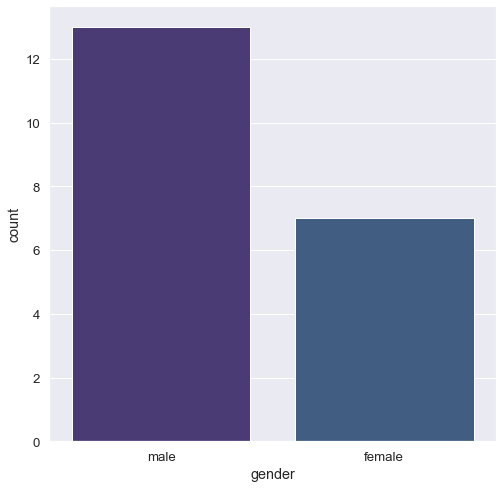

In [14]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='status', ylabel='count'>

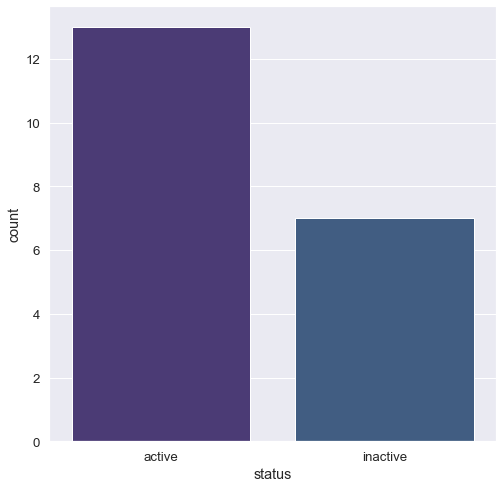

In [15]:
sns.countplot(df['status'])

<AxesSubplot:xlabel='status', ylabel='count'>

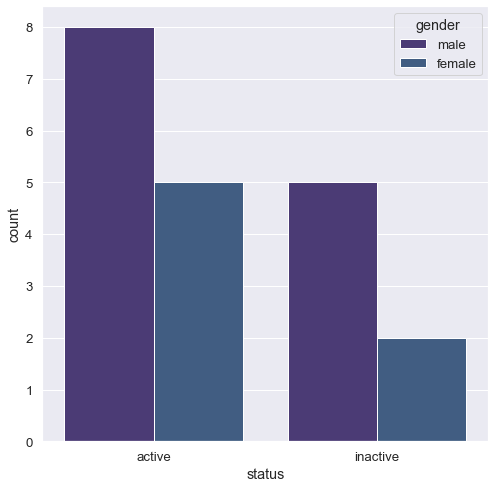

In [16]:
sns.countplot(df['status'],hue=df['gender'])

In [18]:
def get_providers(x):
    x = x.split('@')
    return x[1].split('.')[0]

In [19]:
df['providers'] = df['email'].apply(get_providers)

In [20]:
df['providers']

0                    gmail
1                   tester
2                   tester
3                 testerSP
4                    teste
5             miller-doyle
6                     dach
7        weissnat-medhurst
8             boehm-hessel
9           mckenzie-johns
10           herzog-zulauf
11                testerSP
12                   welch
13               jaskolski
14                  beatty
15                 windler
16    wehner-runolfsdottir
17                    mohr
18              kris-berge
19          pfeffer-schoen
Name: providers, dtype: object